In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from dpp.data import load_from_kaggle


In [25]:
dataset_link = "laotse/credit-risk-dataset" # replace with your dataset link from Kaggle 
destination = "../data/raw"
dataset_name = dataset_link.split("/")[-1]

files = load_from_kaggle(
    dataset_link=dataset_link, 
    destination=destination,
    )

Destination directory '../data/raw\credit-risk-dataset' already exists with files. Skipping download (replace=False).


In [26]:
files

['credit_risk_dataset.csv']

In [27]:
df = pd.read_csv("/".join(["../data/raw/", dataset_name, files[0]]))
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [28]:
display(
    "Shape",
    df.shape,
    "Description",
    df.describe().round(2),
    "Duplicates",
    df.duplicated().sum(),
)


pd.DataFrame(
    {
        "Data Types": df.dtypes,
        "Missing Values": df.isnull().sum(),
        "Unique Values": df.nunique(),
        "Sample Values": [df[col].sample(3).tolist() for col in df.columns]
    })


'Shape'

(32581, 12)

'Description'

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.00,32581.00,31686.00,32581.00,29465.00,32581.00,32581.00,32581.00
mean,27.73,66074.85,4.79,9589.37,11.01,0.22,0.17,5.80
std,6.35,61983.12,4.14,6322.09,3.24,0.41,0.11,4.06
min,20.00,4000.00,0.00,500.00,5.42,0.00,0.00,2.00
25%,23.00,38500.00,2.00,5000.00,7.90,0.00,0.09,3.00
50%,26.00,55000.00,4.00,8000.00,10.99,0.00,0.15,4.00
75%,30.00,79200.00,7.00,12200.00,13.47,0.00,0.23,8.00
max,144.00,6000000.00,123.00,35000.00,23.22,1.00,0.83,30.00


'Duplicates'

np.int64(165)

,Data Types,Missing Values,Unique Values,Sample Values
person_age,int64,0,58,"[30, 34, 30]"
person_income,int64,0,4295,"[100000, 59520, 150000]"
person_home_ownership,object,0,4,"[RENT, RENT, MORTGAGE]"
person_emp_length,float64,895,36,"[3.0, 0.0, 4.0]"
loan_intent,object,0,6,"[EDUCATION, DEBTCONSOLIDATION, MEDICAL]"
loan_grade,object,0,7,"[D, A, A]"
loan_amnt,int64,0,753,"[8400, 12000, 2000]"
loan_int_rate,float64,3116,348,"[10.0, nan, 13.35]"
loan_status,int64,0,2,"[0, 0, 0]"
loan_percent_income,float64,0,77,"[0.04, 0.12, 0.1]"


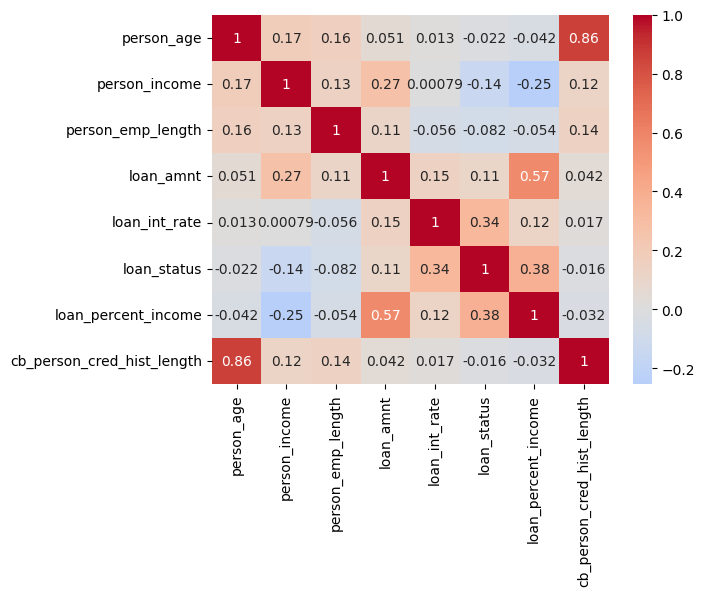

In [29]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", center=0);